# Unsupervised Learning: Clustering Lab





In [ ]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from scipy.io import arff
import requests
import io

## 1. Initial practice with the K-means and HAC algorithms

### 1.1 (10%) K-means
Run K-means on this [Abalone Dataset.](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff)
The dataset was modified to be smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points are commented out. Treat the output class (last column) as an additional input feature. Create your K-Mmeans model with the paramaters K-means(n_clusters=3, init='random', n_init=1)

Output the following:
- Class label for each point (labels_)
- The k=3 cluster centers (cluster_centers_)
- Number of iterations it took to converge (n_iter_)
- Total sum squared error of each point from its cluster center (inertia_)
- The total average silhouette score (see sklearn.metrics silhouette_score)

In [ ]:
# K-means with Abalone
response = requests.get('https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff')

arff_data, meta_data = arff.loadarff(io.StringIO(response.text))
df = pd.DataFrame(arff_data)

X = df

k_values = [2,3,4,5,6,7,8]

for k in k_values:
  kmeans = KMeans(n_clusters=k, init='random', n_init=1)
  kmeans.fit(X)

  sil_score = silhouette_score(X, kmeans.fit_predict(X))
  labels = kmeans.labels_
  cluster_centers = kmeans.cluster_centers_
  iters = kmeans.n_iter_
  inertia = kmeans.inertia_

  print(f'----- k:{k} -----')
  print(f'labels: {labels}')
  print(f'Cluster centers: {cluster_centers}')
  print(f'Iter till convergence: {iters}')
  print(f"Inertia SSE: {inertia}")
  print(f'Sil score: {sil_score}')

----- k:2 -----
labels: [0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1
 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0
 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1]
Cluster centers: [[ 0.60415493  0.4778169   0.16704225  1.21399296  0.46203521  0.25330986
   0.40896479 14.63380282]
 [ 0.45437984  0.35383721  0.11709302  0.53466667  0.22172481  0.12295349
   0.16694961  8.58914729]]
Iter till convergence: 3
Inertia SSE: 914.7337801266518
Sil score: 0.5817542309969228
----- k:3 -----
labels: [2 1 0 0 1 1 2 2 0 2 2 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 1 2
 1 0 0 0 2 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 2 0 1 2 1 2 0
 2 2 0 0 0 2 0 0 2 2 2 0 2 0 0 0 2 0 2 0 2 2 0 1 1 0 1 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0

#### Discussion
Discuss your results. Run it a few times. What happens? How did the cluster silhouette scores compare? <br>
Now play around with k. What happens to the clusters and silhouette scores?

When running this, I found that `k=2` had the best silhouette score with .58. It also converged in many less iteration with only 3 iterations compared to the others that 4-9. As I expected the sse went lower as k increased.

### 1.2 (10%) Hierarchical Agglomerative Clustering (HAC)

Run HAC on the same [Abalone Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff) using complete linkage and k=3.

Output the following:
- Class label for each point (labels_)
- The total average silhouette score

In [ ]:
# HAC with Abalone
response = requests.get('https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff')

arff_data, meta_data = arff.loadarff(io.StringIO(response.text))
df = pd.DataFrame(arff_data)

X = df

clustering = AgglomerativeClustering(n_clusters=3, linkage='complete')
clustering.fit(X)

labels = clustering.labels_
sil_score = silhouette_score(X, clustering.fit_predict(X))

print(f'labels: {labels}')
print(f'Silhouette score: {sil_score}')

labels: [1 0 0 0 0 0 2 1 0 2 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 2 2 1 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 2 1
 1 1 0 0 1 1 0 1 1 2 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 0 0 0 0 0 0 0 0 1 1 2 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0]
Silhouette score: 0.5398112398376158


#### Discussion
How do the clusters compare to your results above? Explain the differences using what you know about HAC.

The ouputted clusters were different for complete linkage compared to K-means. The overall Silhouette score was a little lower than the k-means as well. Since the k-means algorithm mainly focuses on minimizing variance and HAC mainly focuses on balanced/clean clusters, that makes sense that there would be a little lower of a score.

## 2. K-means Clustering with the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff)
Use the Iris data set for 2.1 and 2.2.  Don't include the output label as one of the input features.

### 2.1 (20%) K-means Initial Centroids Experiments
K-means results differ based on the initial centroids used.
- Run K-means 5 times with *k*=4, each time with different initial random centroids (init="random) and with n_init=1.  Give inertia and silhouette scores for each run and discuss any variations in the results.
- SKlearn has a parameter that does this automatically (n_init).  n_init = z runs K-means z times, each with different random centroids and returns the clustering with the best SSE (intertia) of the z runs. Try it out and discuss how it does and how it compares with your 5 runs above.
- Sklearn also has a parameter (init:'K-means++') which runs a simpler fast version of K-means first on the data to come up with good initial centroids, and then runs regular K-means with this centroids.  Try it out (with n_init = 1) and discuss.

In [ ]:
# K-means initial centroid experiments
response = requests.get('https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff')

arff_data, meta_data = arff.loadarff(io.StringIO(response.text))
df = pd.DataFrame(arff_data)

df = df.drop(columns='class')
X = df

runs = range(5)

for run in runs:
  kmeans_1 = KMeans(n_clusters=4, init='random', n_init=1)
  kmeans_1.fit(X)

  inertia = kmeans_1.inertia_
  sil_score = silhouette_score(X, kmeans_1.labels_)

  print(f'--- Run:{run + 1} ---')
  print(f'Inertia: {inertia}')
  print(f'Silhouette Score: {sil_score}')

--- Run:1 ---
Inertia: 71.34822351828498
Silhouette Score: 0.41540495586480414
--- Run:2 ---
Inertia: 57.4732732654949
Silhouette Score: 0.49511999553021513
--- Run:3 ---
Inertia: 57.4732732654949
Silhouette Score: 0.49511999553021513
--- Run:4 ---
Inertia: 71.66131466733202
Silhouette Score: 0.41237747330899416
--- Run:5 ---
Inertia: 71.34044682436698
Silhouette Score: 0.4171050599264815


In [ ]:
# Using n_init=5
print('\n ------ Using n_init=5 ------ ')
kmeans_2 = KMeans(n_clusters=4, init='random', n_init=5)
kmeans_2.fit(X)

inertia = kmeans_2.inertia_
sil_score = silhouette_score(X, kmeans_2.labels_)

print(f'Inertia: {inertia}')
print(f'Silhouette Score: {sil_score}')


 ------ Using n_init=5 ------ 
Inertia: 71.3362224245357
Silhouette Score: 0.41854525161533473


In [ ]:
# Using init='k-means++'
print('\n ------ Using n_init=5 ------ ')
kmeans_3 = KMeans(n_clusters=4, init='k-means++', n_init=1)
kmeans_3.fit(X)

inertia = kmeans_3.inertia_
sil_score = silhouette_score(X, kmeans_3.labels_)

print(f'Inertia: {inertia}')
print(f'Silhouette Score: {sil_score}')


 ------ Using n_init=5 ------ 
Inertia: 57.4732732654949
Silhouette Score: 0.49511999553021513


#### Discussion
Discuss your results. How does n_init work and compare with your first results without using n_init. <br>
How does K-means++ work? Compare it to your previous runs.

Based on the output, whether using n_init=5 or running your model 5 times the output was essentially identical for the scores and inertia. There was a substantial difference when using the `k-means++`. When running the `k-means++` param, my inertia, went down and my silhouette score went up. Under the hood,
it elects initial cluster centroids using sampling based on an empirical probability distribution of the point's contribution to the overall inertia. This technique speeds up convergence.

### 2.2 (20%) Silhouette Graphs
In this part you will show silhouette graphs for different *k* values.  Install the [Yellowbrick visualization package](https://www.scikit-yb.org/en/latest/quickstart.html) and import the [Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html).  This library includes lots of visualization packages which you might find useful. (Note: The YellowBrick silhouette visualizer does not currently support HAC).
- Show Silhouette graphs for clusterings with *k* = 2-6. Print the SSE (inertia) and total silhouette score for each.
- Learn with the default n_init = 10 to help insure a decent clustering.
- Using the silhouette graphs, choose which *k* you think is best and discuss why. Think about and discuss more than just the total silhouette score.

In [ ]:
pip install yellowbrick

 ----- k:2 -----
Inertia: 152.36870647733915
Silhouette Score: 0.6808136202936816


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


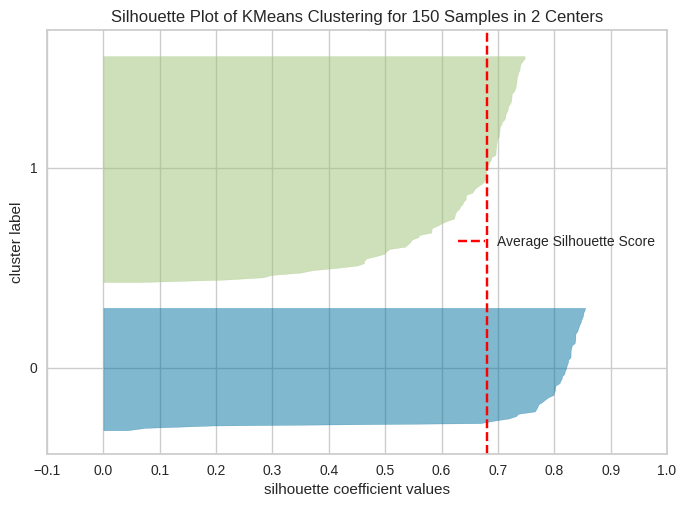

 ----- k:3 -----
Inertia: 78.94084142614601
Silhouette Score: 0.5525919445499757


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


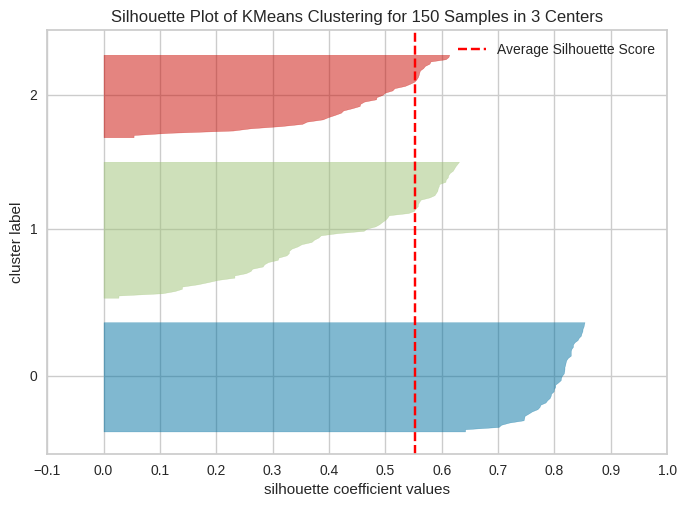

 ----- k:4 -----
Inertia: 57.317873214285726
Silhouette Score: 0.4978256901095472


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


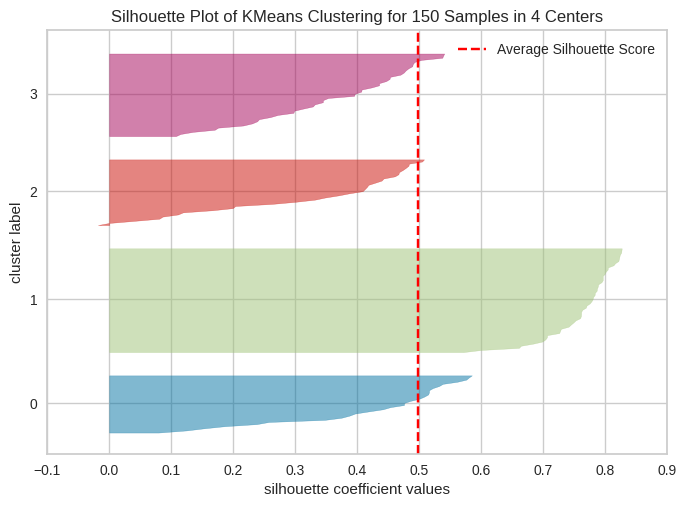

 ----- k:5 -----
Inertia: 46.535582051282034
Silhouette Score: 0.4885175508886279


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


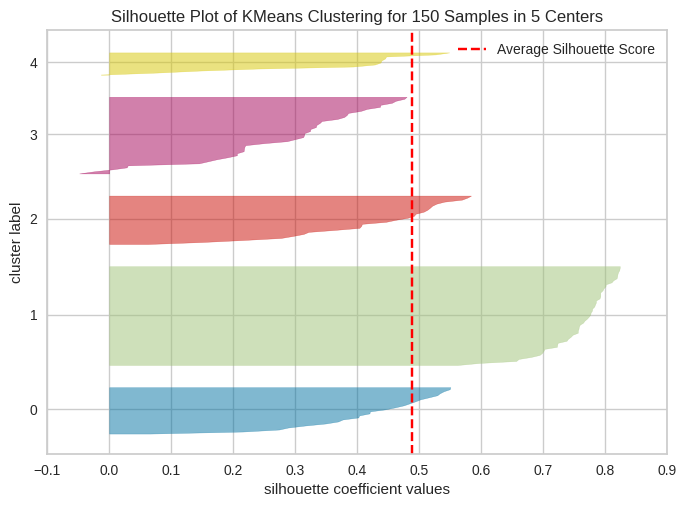

 ----- k:6 -----
Inertia: 39.17748099838968
Silhouette Score: 0.36935505701841964


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


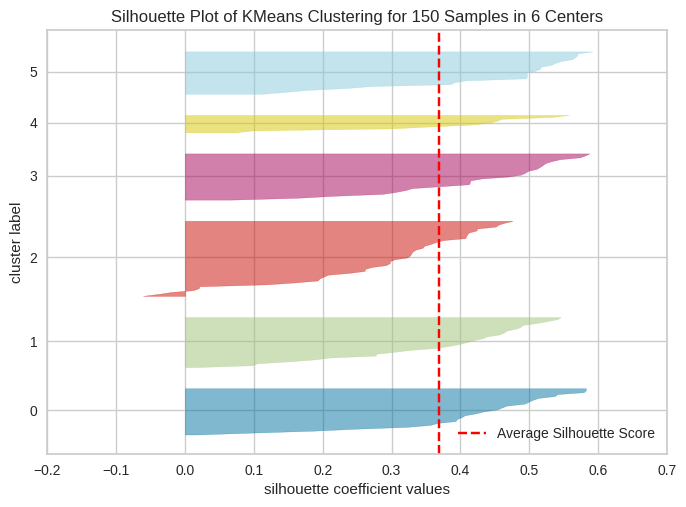

In [ ]:
# Iris Clustering with K-means and silhouette graphs
from yellowbrick.cluster import SilhouetteVisualizer

k_values = range(2,7)

for k in k_values:
  kmeans = KMeans(n_clusters=k, n_init=10)
  kmeans.fit(X)

  inertia = kmeans.inertia_
  sil_score = silhouette_score(X, kmeans.labels_)

  print(f' ----- k:{k} -----')
  print(f'Inertia: {inertia}')
  print(f'Silhouette Score: {sil_score}')

  visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
  visualizer.fit(X)
  visualizer.show()

#### Discussion
Discuss your results and justify which clustering is best based on the silhouette graphs

Based on the graphs and the outputted silhouette scores, when `k=2`that seems to be the best clustering. As we increase the 3 of clusters, the graphs become worse, as well as, the silhouette scores...

## 3 (20%) Iris Clustering with HAC

- Use the same dataset as above and learn with HAC clustering
- Create one table with silhouette scores for k=2-6 for each of the linkage options single, average, complete, and ward

In [ ]:
#HAC with Iris
k_values = range(2,7)
linkage_options = ['single', 'average', 'complete', 'ward']
results = []

for linkage in linkage_options:
  for k in k_values:
    clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    clustering.fit(X)

    sil_score = silhouette_score(X, clustering.labels_)

    results.append({'Linkage': linkage, 'k': k, 'Silhouette Score': sil_score})

pd.DataFrame(results)

,Linkage,k,Silhouette Score
0,single,2,0.686393
1,single,3,0.511839
2,single,4,0.281778
3,single,5,0.283484
4,single,6,0.221114
5,average,2,0.686393
6,average,3,0.553934
7,average,4,0.471665
8,average,5,0.430342
9,average,6,0.340659


#### Discussion
Discuss your results and compare with your k-means results. <br>
Discuss your table that contains the silhouette scores for k=2,3,4,5,6 and for each of the different linkage options. <br>
Discuss how the linkage options affect your scores.

When doing both HAC and k-means, they showed that when k=2 produced the best scores. In HAC, the single linkage dropped off quickly after k =2, while average and ward linkage were more consistent (but had lower scores). Ward linkage looked to be the most similiar to the k-means. I would think this would be the case since they Ward wants to minimize variance and that is always what k-means is doing.

## 4 (20%) Run both algorithms on a real world data
- Choose any real world data set which you have not used previously
- Use parameters of your choosing
- Try each algorithm a few times with different parameters and output one typical example of labels and silhouette scores for each algorithm
- Show the silhouette graph for at least one reasonable *k* value for K-means

In [ ]:
# Run both algoriths on a data set of your choice
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
k_values = range(2,7)
init_values = range(1,10)

# K means

for k in k_values:
  for init_value in init_values:
    kmeans = KMeans(n_clusters=k, n_init=init_value)
    kmeans.fit(X)

    inertia = kmeans.inertia_
    labels = kmeans.labels_
    sil_score = silhouette_score(X, labels)

    print(f' --- k:{k} --- Init Val:{init_value}')
    print(f'Inertia: {inertia}')
    # print(f'labels: {labels}')
    print(f'Silhouette Score: {sil_score}')
    print('\n')



print(' ------------------- HAC -------------------')
linkage_options = ['single', 'average', 'complete', 'ward']
results_hac = []

for linkage in linkage_options:
  for k in k_values:
    clustering = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    clustering.fit(X)

    labels = clustering.labels_
    sil_score = silhouette_score(X, labels)

    results_hac.append({'Linkage': linkage, 'k': k, 'Silhouette Score': sil_score})

pd.DataFrame(results_hac)

 --- k:2 --- Init Val:1
Inertia: 77943099.87829883
Silhouette Score: 0.6972646156059464


 --- k:2 --- Init Val:2
Inertia: 77943099.87829883
Silhouette Score: 0.6972646156059464


 --- k:2 --- Init Val:3
Inertia: 77943099.87829883
Silhouette Score: 0.6972646156059464


 --- k:2 --- Init Val:4
Inertia: 77943099.87829883
Silhouette Score: 0.6972646156059464


 --- k:2 --- Init Val:5
Inertia: 77943099.87829883
Silhouette Score: 0.6972646156059464


 --- k:2 --- Init Val:6
Inertia: 77943099.87829883
Silhouette Score: 0.6972646156059464


 --- k:2 --- Init Val:7
Inertia: 77943099.87829883
Silhouette Score: 0.6972646156059464


 --- k:2 --- Init Val:8
Inertia: 77943099.87829883
Silhouette Score: 0.6972646156059464


 --- k:2 --- Init Val:9
Inertia: 77943099.87829883
Silhouette Score: 0.6972646156059464


 --- k:3 --- Init Val:1
Inertia: 50517769.559281915
Silhouette Score: 0.5471360437420352


 --- k:3 --- Init Val:2
Inertia: 47336610.421990514
Silhouette Score: 0.6752581310732738


 --- k:3

,Linkage,k,Silhouette Score
0,single,2,0.798987
1,single,3,0.687467
2,single,4,0.692765
3,single,5,0.693605
4,single,6,0.667298
5,average,2,0.690935
6,average,3,0.672580
7,average,4,0.657421
8,average,5,0.652574
9,average,6,0.627922



 Kmeans with k=2 (best params):
Labels: [1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


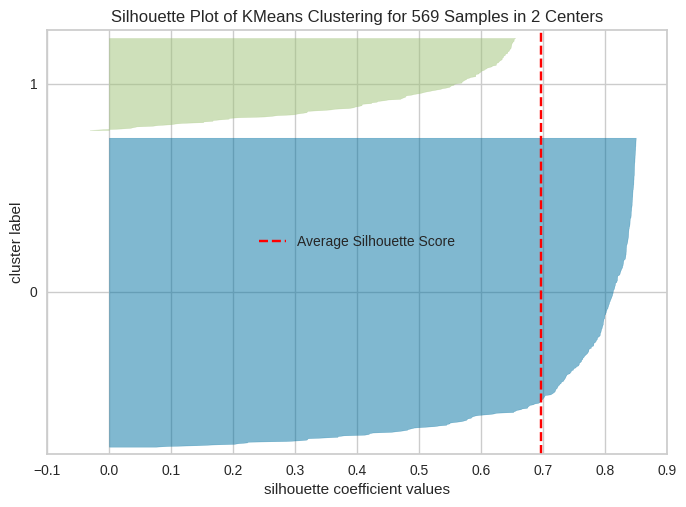

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 569 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# best is k = 2 with any val for init
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
sil_score = silhouette_score(X,labels)

print("\n Kmeans with k=2 (best params):")
print("Labels:", labels)
print("Silhouette Score:", sil_score)

visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

#### Discussion
Discuss your results and compare the algorithms you used. Which worked best? How do you know? Base your discussion on what you know about the algorithms and the hyperparameters and scoring methods. Why would you choose either algorithm?

Over for the real world data, I did similiar things as described above in the lab, namely: trying out a bunch of different k-values and testing different linkage options. For this dataset, I found that when k=2 with single linkage, the HAC had the best score of .779, which was better than all other scores (including that of k-means). Looking at my outputs, I found that the HAC scores were a bit more stable was we changed k values/linkage methods. I would use HAC (even though it is slower than k-means) due to the higher silhouette scores.

## 5. Extra Credit for Coding Your Own Clustering Algorithms
### 5.1 (Optional 10% extra credit) Code up the K-means clustering algorithm
Below is a scaffold you could use if you want. As above, you only need to support numeric inputs, but think about how you would support nominal inputs and unknown values. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to choose *k* and specify the *k* initial centroids.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

### 5.2 (Optional 10% extra credit) Code up the HAC clustering algorithm

- Your model should support the methods shown in the example scaffold below.
- HAC should support both single link and complete link options.
- HAC automatically generates all clusterings from *n* to 2.  You just need to output results for the curent chosen *k*.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

#### Discussion
Discussion and comparision of each model implemented

** Your discussion goes here **

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin, ClusterMixin

class KMEANSClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,debug=False): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            debug = if debug is true use the first k instances as the initial centroids otherwise choose random points as the initial centroids.
        """
        self.k = k
        self.debug = debug

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self

    def print_labels(self): # Print the cluster label for each data point
        pass

In [ ]:
class HACClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,link_type='single'): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            link_type = single or complete. when combining two clusters use complete link or single link
        """
        self.link_type = link_type
        self.k = k

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self

    def print_labels(self): # Print the cluster label for each data point
        pass